In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
df = pd.read_csv('Iris.csv')


In [69]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [71]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [72]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [73]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))


Id -- 150
SepalLengthCm -- 35
SepalWidthCm -- 23
PetalLengthCm -- 43
PetalWidthCm -- 22
Species -- 3


<Axes: xlabel='Species', ylabel='PetalLengthCm'>

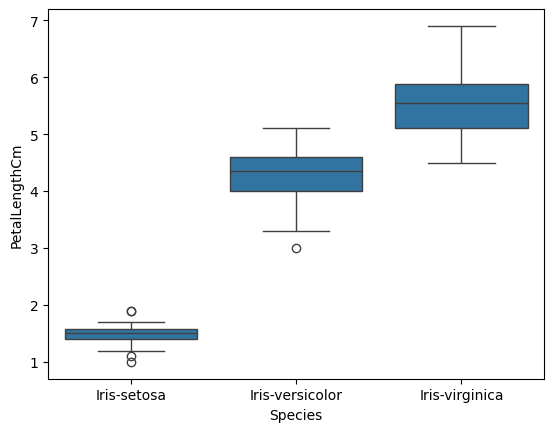

In [74]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

In [75]:
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

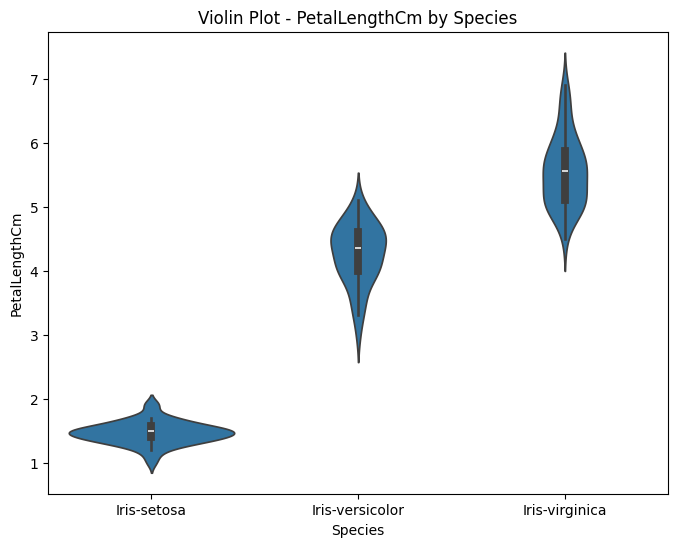

In [76]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Species", y="PetalLengthCm", data=df)
plt.title("Violin Plot - PetalLengthCm by Species")
plt.show()


In [77]:
features = ['PetalLengthCm', 'PetalWidthCm']
X = df[features]
y = df['Species'].astype('category').cat.codes


In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [79]:
results = pd.DataFrame(columns=['K', 'Accuracy'])
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.loc[k-1] = [k, acc]


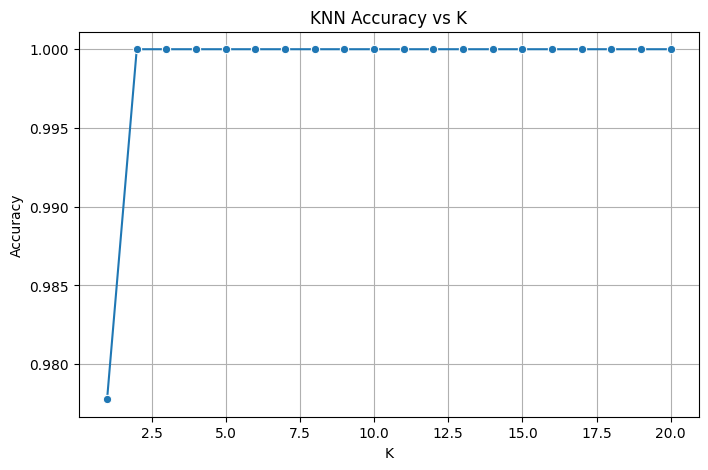

In [80]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='K', y='Accuracy', data=results, marker='o')
plt.title('KNN Accuracy vs K')
plt.grid(True)
plt.show()


In [81]:
best_k = results.loc[results['Accuracy'].idxmax(), 'K']
print(f"Best K = {int(best_k)}")

Best K = 2


In [82]:
final_model = KNeighborsClassifier(n_neighbors=int(best_k))
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)

In [83]:
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, final_preds)))

print("\nClassification Report:")
print(classification_report(y_test, final_preds, target_names=df['Species'].unique()))


Confusion Matrix:
    0   1   2
0  19   0   0
1   0  13   0
2   0   0  13

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [84]:
accuracy_score(y_test, y_pred) * 100

100.0

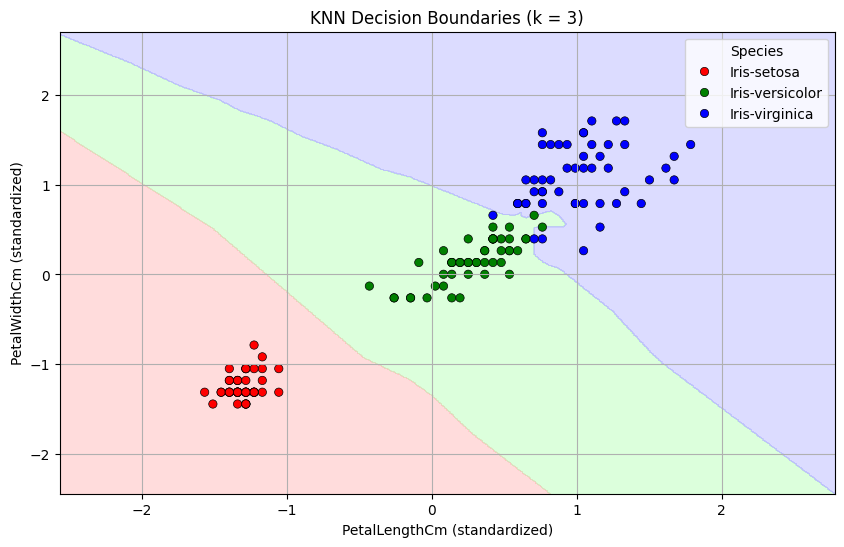

In [85]:


k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled, y)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = knn.predict(grid)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Species'], palette=cmap_bold, edgecolor='k')
plt.xlabel("PetalLengthCm (standardized)")
plt.ylabel("PetalWidthCm (standardized)")
plt.title(f"KNN Decision Boundaries (k = {k})")
plt.grid(True)
plt.show()